In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import seaborn as sns

In [4]:
import plotly.express as px 

In [5]:
import matplotlib.pyplot as plt 

In [6]:
import plotly.graph_objs as go 

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [11]:
df = pd.read_csv("healthcare_dataset.csv")

In [12]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [13]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,8/16/2020,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,9/15/2020,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,1/23/2020,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797310,316,Elective,2/1/2020,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,7/13/2020,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764720,347,Urgent,8/10/2020,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,5/25/2019,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092360,321,Elective,5/31/2019,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,4/2/2024,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,4/29/2024,Ibuprofen,Abnormal


In [14]:
df['Name'] = df['Name'].str.lower()

In [15]:
df.sample(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
16208,jennifer cooper,47,Male,B-,Diabetes,4/2/2020,Felicia Williams,Harding-Bush,Cigna,38354.785880,429,Urgent,4/4/2020,Penicillin,Inconclusive
27905,stephanie sims,56,Male,O+,Hypertension,2/7/2020,Tammy Stevenson,"and Braun, Jones Glenn",Blue Cross,30419.850120,486,Emergency,3/2/2020,Ibuprofen,Normal
21464,angela allen,83,Male,AB-,Arthritis,6/16/2019,Dr. Andrew Rivera,Inc Wilson,UnitedHealthcare,29671.340510,303,Emergency,7/4/2019,Ibuprofen,Normal
26884,donald nelson,28,Female,AB-,Diabetes,11/6/2020,Brenda Wright,"Smith, Phillips Smith and",Aetna,19705.096490,241,Elective,11/22/2020,Aspirin,Abnormal
10781,joshua miller,75,Male,AB+,Arthritis,1/22/2020,Lisa Pacheco,"and Wolfe Collins Williams,",Cigna,25710.516410,101,Elective,2/10/2020,Aspirin,Abnormal
18784,brian harrison,50,Female,AB+,Asthma,2/26/2021,Thomas Simmons,Higgins-Rivera,Medicare,29580.502100,446,Elective,3/1/2021,Paracetamol,Normal
13248,heather yang,84,Male,AB-,Diabetes,9/17/2020,Brian Ochoa,"Johnson Stone and Morris,",Blue Cross,47638.487300,128,Urgent,10/7/2020,Paracetamol,Inconclusive
41600,crystal dodson,49,Female,B-,Asthma,7/22/2020,Taylor Gardner,Wood-Thomas,Aetna,28451.779140,362,Emergency,8/3/2020,Aspirin,Normal
6234,kimberly hernandez,62,Male,B+,Asthma,10/26/2023,Kristy Huffman,Long LLC,Blue Cross,8906.197871,447,Urgent,11/11/2023,Lipitor,Normal
20020,jamie gray md,44,Male,A+,Diabetes,9/6/2019,Renee Nichols,"Davis, Roberson and Benson",UnitedHealthcare,19523.637490,272,Elective,9/13/2019,Penicillin,Normal


In [16]:
df.duplicated().sum()

534

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7

In [20]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [21]:
df.describe

<bound method NDFrame.describe of                     Name  Age  Gender Blood Type Medical Condition  \
0          bobby jackson   30    Male         B-            Cancer   
1           leslie terry   62    Male         A+           Obesity   
2            danny smith   76  Female         A-           Obesity   
3           andrew watts   28  Female         O+          Diabetes   
4          adrienne bell   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  elizabeth jackson   42  Female         O+            Asthma   
55496         kyle perez   61  Female        AB-           Obesity   
55497       heather wang   38  Female         B+      Hypertension   
55498     jennifer jones   43    Male         O-         Arthritis   
55499       james garcia   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith         

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,54966.0,51.535185,19.605661,13.00000,35.000000,52.000000,68.000000,89.00000
Billing Amount,54966.0,25544.306284,14208.409711,-2008.49214,13243.718638,25542.749145,37819.858157,52764.27674
Room Number,54966.0,301.124404,115.223143,101.00000,202.000000,302.000000,401.000000,500.00000


In [23]:
df.describe(include= "object").T

,count,unique,top,freq
Name,54966,40235,michael williams,24
Gender,54966,2,Male,27496
Blood Type,54966,8,A-,6898
Medical Condition,54966,6,Arthritis,9218
Doctor,54966,40341,Michael Smith,27
Hospital,54966,39876,LLC Smith,44
Insurance Provider,54966,5,Cigna,11139
Admission Type,54966,3,Elective,18473
Medication,54966,5,Lipitor,11038
Test Results,54966,3,Abnormal,18437


In [24]:
df['Gender'].value_counts()

Male      27496
Female    27470
Name: Gender, dtype: int64

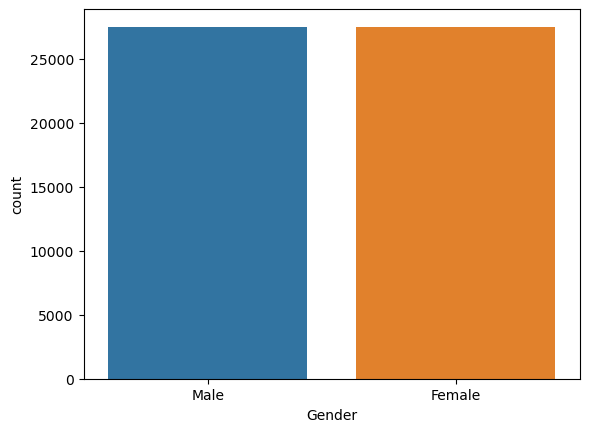

In [25]:
sns.countplot(data=df, x="Gender")
plt.show()

In [26]:
print(df['Blood Type'].value_counts())

A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: Blood Type, dtype: int64


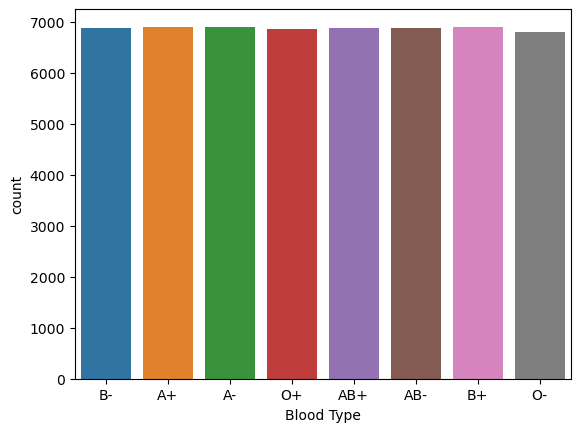

In [27]:
sns.countplot(data=df, x="Blood Type")
plt.show()

In [28]:
grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Blood Type and Gender',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender': 'Gender'})
fig.show()

In [29]:
print(df['Admission Type'].value_counts())

Elective     18473
Urgent       18391
Emergency    18102
Name: Admission Type, dtype: int64


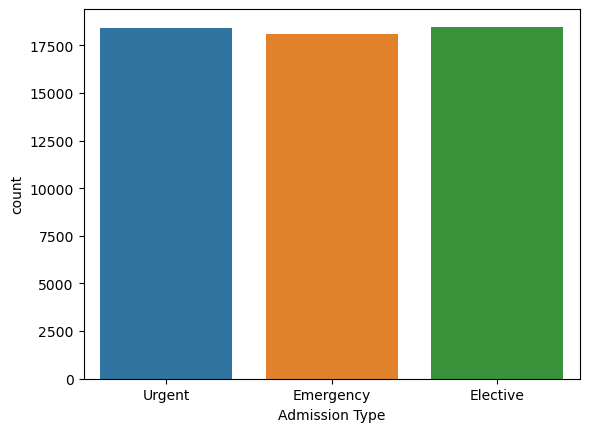

In [30]:
sns.countplot(data=df, x='Admission Type')
plt.show()

In [31]:
print(df['Medical Condition'].value_counts())

Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: Medical Condition, dtype: int64


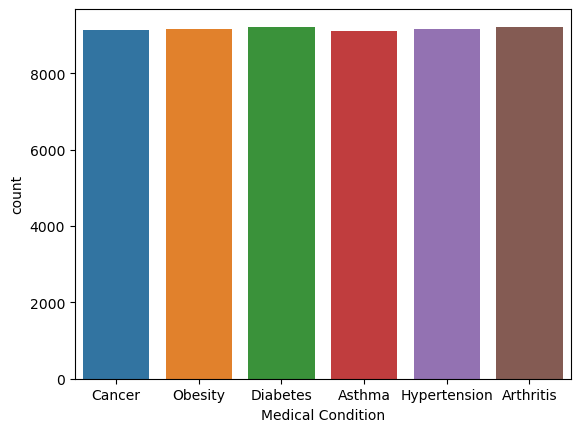

In [32]:
sns.countplot(data=df, x="Medical Condition")
plt.show()

In [33]:
grouped_df = df.groupby(['Medical Condition', 'Admission Type']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medical Condition', y='Count', color='Admission Type', barmode='group',
             title='Patient Count by Medical Condition and Admission Type',
             labels={'Count': 'Patient Count', 'Medical Condtion': 'Medical Condition', 'Admission Type': 'Admission Type'})
fig.show()

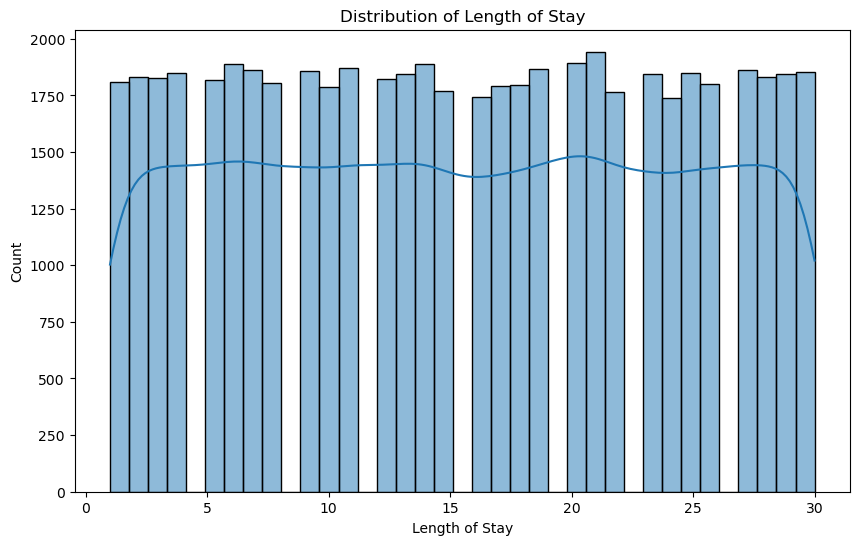

In [34]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], kde=True)
plt.title('Distribution of Length of Stay')
plt.show()

In [35]:
print(df['Insurance Provider'].value_counts())

Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: Insurance Provider, dtype: int64


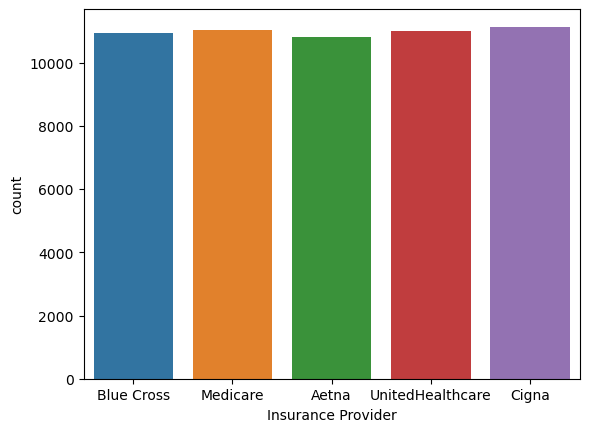

In [36]:
sns.countplot(data=df, x="Insurance Provider")
plt.show()

In [37]:
print(df['Test Results'].value_counts())

Abnormal        18437
Normal          18331
Inconclusive    18198
Name: Test Results, dtype: int64


In [38]:
print(df['Test Results'].value_counts().sum())

54966


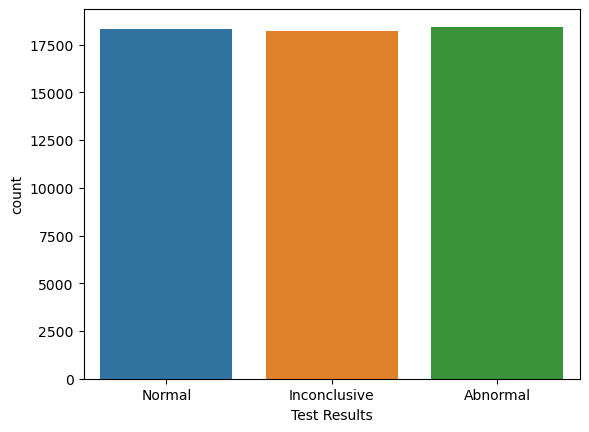

In [39]:
sns.countplot(data=df, x="Test Results")
plt.show()

In [40]:
print(df['Medication'].value_counts())

Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: Medication, dtype: int64


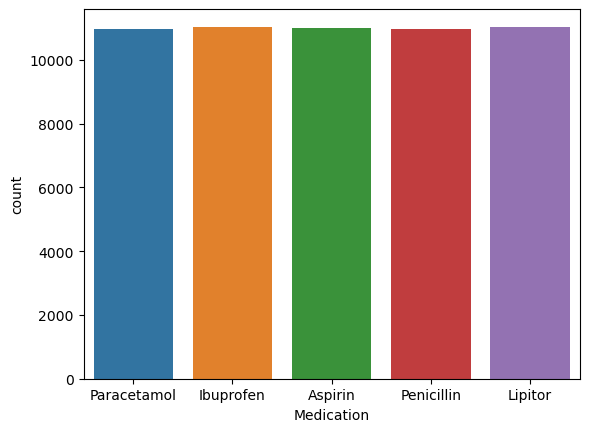

In [41]:
sns.countplot(data=df, x="Medication")
plt.show()

In [42]:
print(df['Doctor'].value_counts())

Michael Smith      27
John Smith         22
Robert Smith       21
James Smith        20
Michael Johnson    20
                   ..
Shane Tate          1
Christy Parker      1
Larry Miller        1
Chelsea Neal        1
Jeffrey Moore       1
Name: Doctor, Length: 40341, dtype: int64


This section talks about the number of patients each doctor has. 

In [43]:
print(df['Doctor'].value_counts().sum())

54966


This shows the total patients the doctors see. 

In [44]:
print(df['Age'].value_counts())

38    890
57    881
37    880
34    858
80    855
     ... 
88     25
16     24
14     18
13     14
89      8
Name: Age, Length: 77, dtype: int64


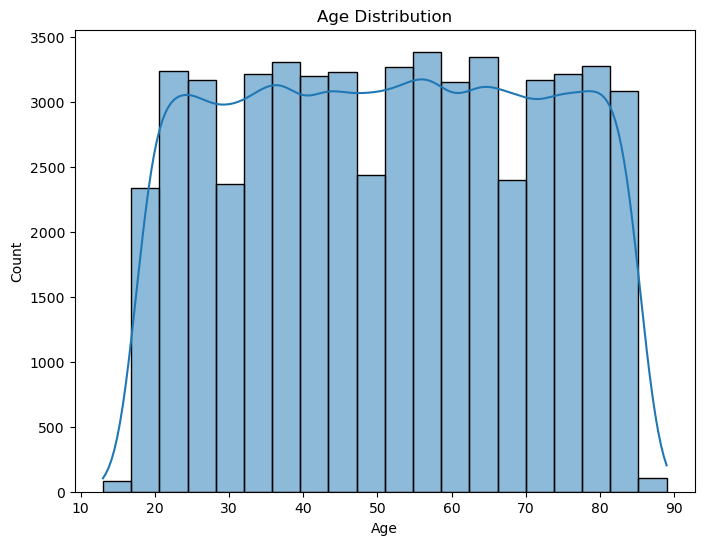

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Some questions for the Dataset

1. What is the most common blood type among patients? 

In [46]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")

The most common blood type among the patients is A-.


2. How many unique hospitals are included in the dataset? 

In [47]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


3. Who is the oldest patient in the dataset? What's their age? 

In [48]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is david newton with an age of 89 years.


4. Which doctor has treated the highest number of patients? 

In [49]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is Michael Smith.


5. What is the most frequently prescribed medication? 

In [50]:
most_frequent_medication = df['Medication'].value_counts().idxmax()

print(f"The most frequently prescribed medicaiton is {most_frequent_medication}.")

The most frequently prescribed medicaiton is Lipitor.


6. How many male and female patients are there? 

In [51]:
male_patients = df[df['Gender']== 'Male'].shape[0]
female_patients = df[df['Gender']== 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27496 Male patients and 27470 Female patients.


7. What are the 3 most common medical conditions patients have? 

In [52]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three most Common Medical Conditions:")
print(top_three_medical_conditions)

Top Three most Common Medical Conditions:
Arthritis       9218
Diabetes        9216
Hypertension    9151
Name: Medical Condition, dtype: int64


8. Are there any seasonal trends in the hospital admission? 

To determine this, we first need to calcuate the monthly admissions

In [53]:
#Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

Next, we will need to create a dataframe specifically for the monthly admissions 

In [54]:
#Create Dataframe
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

Finally, we will plot the trend using Plotly Express

In [55]:
#Plot the trend using Plotly Express

fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admission Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()

This next pair of graphs will show the Billing Amount Distribution. 

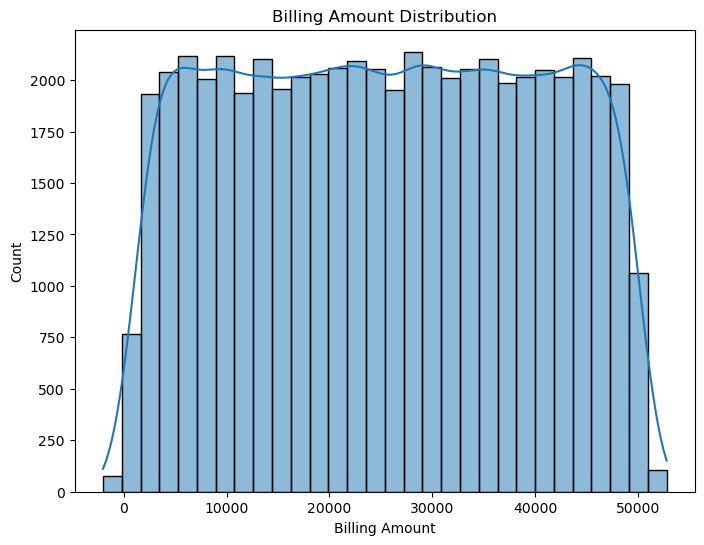

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution')
plt.show()

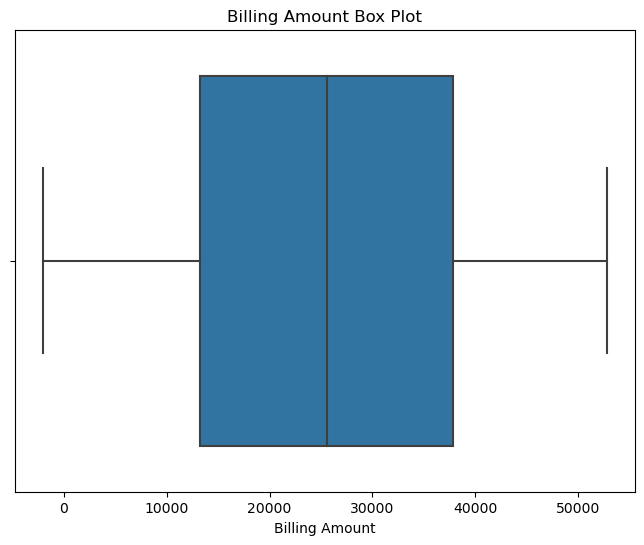

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Billing Amount')
plt.title('Billing Amount Box Plot')
plt.show()